# Sheet 3: Solution

In [10]:
options(jupyter.plot_mimetypes = 'image/png',repr.plot.width=4,repr.plot.height=4) # this is just to render graphics as png and not as svg, and to adjust the default size

## Exercise 1: High-dimensional learning

We consider data points $(x_1, \ldots, x_N)$ and let $r_i = \| x_i \|.$ Let 
$U(A)$ be the set of all $N$-tuples with $A<r_1<\ldots<r_N<1.$ Ignoring subsets of measure zero, the set of all $N-$tuples is the disjoint union of the $N!$ different subsets obtained from $U(0)$ by permuting
the indexing set $(1,\ldots, N).$ We are interested in $A>0$ such that the measure $U(A)$ if half the measure of $U(0).$ The same $A$ will work for each of the $N!$ disjoint subsets, and will
therefore give the median for the distance of the smallest $x_i$ from the origin.

We want to find $A$ such that
$$ \int_{U(A)} dx_1 \ldots dx_N = \frac12 \int_{U(0)} dx_1 \ldots dx_N.$$ 

Consider the integral in the spherical coordinates. Since the coordinate in the unit sphere $S^{p-1}$ contributes
the same constant on each side of the equality, obtaining
$$ 
\int_{A<r_1<\ldots<r_N<1} r_1^{p-1}\ldots r_N^{p-1} dr_1 \ldots dr_N = \frac12 \int_{0<r_1<\ldots<r_N<1} r_1^{p-1}\ldots r_N^{p-1} dr_1 \ldots dr_N.
$$

Substitude the variables to $s_i = r_i^p.$ Then we obtain
$$ 
\int_{A^p<s_1<\ldots<s_N<1} ds_1 \ldots ds_N = \frac12 \int_{0<s_1<\ldots<s_N<1}  ds_1 \ldots ds_N.
$$

Change the coordinates in the left-hand side integral to
$$ t_0 = s_1 - A^p, t_1 = s_2 - s_1, \ldots, t_{N-1} = s_N - s_{N-1}, t_N = 1 - s_N.$$

The Jacobian (omitting $t_0$ which is a redundant variable) is a triangular matrix with $-1$ entries down the diagonal. The absolute value of its determinant, used in the change of
variable formula for integration, is therefore equal to $1.$

The region over which we integrate is
$$\sum_{i = 0}^N t_i = 1-A^p, \quad \forall t_i >0.$$


The right-hand side of the integral can be treated in the same way, setting $A=0.$ Since the region of integration is $N-$dimensional the measure is multiplied by $(1-A^p)^N.$ Finally solve for $A$ by solving $(1-A^p)^N = \frac12.$

<b>More intuitive explanation:</b> The volume of an $p-$dimensional hyperball of radius $r$ has a volume proportional to $r^p$.So the proportion of the volume more than a distance $kr$ from the origin is $\frac{r^p−(kr)^p}{r^p}=1−k^p$.

The probability that all $N$ randomly chosen points are more than a distance $kr$ from the origin is $(1−k^p)^N$. To get the median distance to the nearest random point, set this probability equal to $\frac12$. So
$(1−kp)^N=\frac12,$ which leads to the desired formula $k = \left( 1- \frac{1}{2^{1/N}} \right)^{1/p}$.

Intuitively this makes some sort of sense: the more random points there are, the closer you expect the nearest one to the origin to be, so you should expect $k$ to be a decreasing function of $N$. Here $2^{1/N}$ is a decreasing function of $N,$ so $\frac{1}{2^{1/N}}$ is an increasing function of $N$, and thus $1−\frac{1}{2^{1/N}}$ is a decreasing function of $N$ as is its $p$th root.

## Exercise 2: Bayes Classifier

<b>Part 1:</b> Having determined that the Bayes classifier is of the form $f_t$ for
some $t$, one idea for estimating it is to estimate $t$ by minimizing
the empirical misclassification rate. We repeat the data generation and simulation from Sheet 1 here.

In [11]:
N <- 1000
Y <- rbinom(N, 1, 0.5)
mu <- c(0, 3)[Y + 1]
X <- rnorm(N, mu, 1)

The minimization can be done naively in this case by evaluating the
empirical misslassification rate on a grid and choose the minimizer.

In [12]:
thres <- seq(-4, 8, 0.01) 
aveMisclas <- function(t) mean((X >= t) != Y)
misclasEmp <- sapply(thres, aveMisclas)
thres[which.min(misclasEmp)]

[1] 1.19

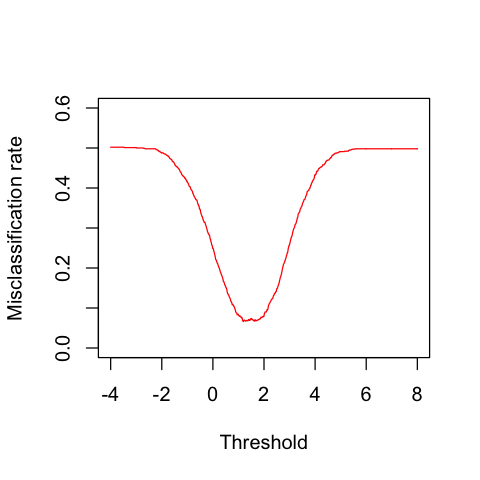

In [13]:
plot(thres, misclasEmp, type = "l", col = "red", ylim = c(0, 0.6),
     xlab = "Threshold", ylab = "Misclassification rate")

In the alternative, we can use a more systematic approach and use a
general purpose optimizer with the empirical misclassification rate as
the objective function. 

In [14]:
optimize(aveMisclas, c(-4, 8))

$minimum
[1] 1.34129

$objective
[1] 0.067

The latter approach may actually not work correctly (it may easily fail
to find the true minimum), because the function is not smooth. In
fact, it is discontinuous. 

An alternative approach is to estimate the parameters in the normal
distributions instead and then compute the resulting Bayes classifier
for the estimated parameters. 

In [15]:
t <- (mean(X[Y == 1]) + mean(X[Y == 0]))/2
t

[1] 1.457955

This solution is well behaved computationally, but it does rely on model
assumptions.  

<b> Part 2:</b> We can observe that with two classes we have the general formula for
the conditional probability according to Bayes' theorem: 
\begin{eqnarray*}
P(Y=1 \mid X = x) & = & \frac{P(X=x \mid Y=1)P(Y=1)}{P(X=x \mid Y=0)P(Y=0)+P(X=x \mid Y=1)P(Y=1)} \\
& = & \frac{\pi_1 g_1(x)}{\pi_0 g_0(x) + \pi_1 g_1(x)}  \\
& = & \frac{h(x)}{1 + h(x)} 
\end{eqnarray*}
where 
$$h(x) = \frac{\pi_1 g_1(x)}{\pi_0 g_0(x)}.$$ 
If the $g_k$'s are densities for the normal distribution with equal
variance $\sigma^2$ and mean values $\mu_k$ we get that 
\begin{eqnarray*}
\log h(x) & = & \log \frac{\pi_1}{\pi_0} + \frac{(x-\mu_0)^2 -
    (x-\mu_1)^2}{2\sigma^2} \\
& = & \log \frac{\pi_1}{\pi_0}  + \frac{\mu_0^2 - \mu_1^2 +
    2(\mu_1-\mu_0)x}{2\sigma^2} \\
& = & \alpha + \beta x
\end{eqnarray*}
with $\alpha = \log \frac{\pi_1}{\pi_0} + \frac{\mu_0^2 - \mu_1^2}{2\sigma^2}$ and $\beta =
\frac{(\mu_1-\mu_0)}{\sigma^2}$. 

This conditional model, with $h$ as given above, is usually called the
<i>logistic regression  model</i>. Note that for this model the
conditional probability, $P(Y=1 \mid X=x)$, is 0.5 for (hence $h(x) = 1$)
$$x = - \frac{\alpha}{\beta},$$
which is thus the threshold for the Bayes classifier. For $\pi_0 = \pi_1 = 0.5$ 
$$- \frac{\alpha}{\beta} = - \frac{\mu_0^2 - \mu_1^2}{2(\mu_1-\mu_0)} =  \frac{(\mu_0 -
  \mu_1)(\mu_0+\mu_1)}{2(\mu_0-\mu_1)} = \frac{\mu_0+\mu_1}{2}$$
as it is supposed to.

We can fit this conditional model as a logistic regression model using
the glm() function.

In [16]:
alphabeta <- coefficients(glm(Y ~ X, family = binomial))
t <- -alphabeta[1]/alphabeta[2]
print(alphabeta)
t

(Intercept)           X 
  -4.813421    3.259094 


(Intercept) 
    1.47692

Note: For N = 100, sometimes the fitted logistic regression parameters are not very stable, that is why t from logistic regression could be far away from theorectical optima 1.5. Try N = 1000 and everything should work as expected.

<b> Part 3:</b> With unequal variances the simulation can be done as follows.

In [20]:
N <- 1000
Y <- rbinom(N, 1, 0.5)
mu <- c(0, 3)[Y + 1]
sd <- c(1, 5)[Y + 1]
X <- rnorm(N, mu, sd)

We take a look at the density plots again. It shows again the empirical
marginal distribution of $X$ and the empirical conditional distributions of $X$
divided according to the two groups.

 [1] -14 -12 -10  -8  -6  -4  -2   0   2   4   6   8  10  12  14  16  18  20
[1] -13.49067  19.80826


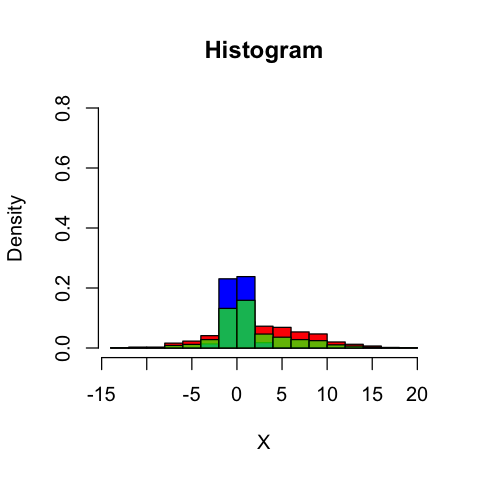

In [21]:
breaks <- pretty(X, 12)
print(pretty(X, 12))
print(range(X))
  hist(X[Y == 1], breaks, freq = FALSE, ylim = c(0, 0.8), 
       xlim = range(breaks), col = "red", main = "Histogram", 
       xlab = "X")
  hist(X[Y == 0], breaks, freq = FALSE, col = "blue", add = TRUE)
  hist(X, breaks, freq = FALSE, add = TRUE, col = rgb(0, 1, 0, 0.7))

What should be noted is that large negative values also come
from group 1. 

The way of computing the average prediction errors for $f_t$ does not
change, and the theoretical computation yields
\begin{eqnarray*}
\textrm{EPE}(f_t) & = & (\Phi_{3,5}(t) + 1 - \Phi_{0,1}(t))/2,
\end{eqnarray*}
where $\Phi_{\mu,\sigma}$ denotes the cumulative distribution function for the normal distribution with mean $\mu$ and variance $\sigma^2.$

[1] 0.1525093


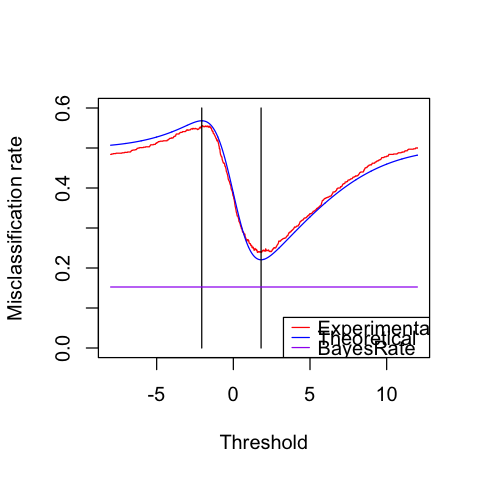

In [22]:
thres <- seq(-8, 12, 0.01) 
aveMisclas <- function(t) mean((X >= t) != Y)
misclasEmp <- sapply(thres, aveMisclas)
theoMisclas <- function(t) (pnorm(t, 3, 5) + 1 - pnorm(t))/2
misclasTheo <- theoMisclas(thres)
plot(thres, misclasEmp, type = "l", col = "red", ylim = c(0, 0.6),
     xlab = "Threshold", ylab = "Misclassification rate")
lines(thres, misclasTheo, type = "l", col = "blue")
z <- (-6 + c(-1,1)*sqrt(36+24*4*(9+50*log(5))))/48
lines(c(z[1], z[1]), c(0, 0.6))
lines(c(z[2], z[2]), c(0, 0.6))
BayesRate <- (pnorm(z[2], 3, 5) - pnorm(z[1], 3, 5) + 
              pnorm(z[1]) + 1 - pnorm(z[2]))/2
print(BayesRate)    
lines(c(-8, 12), c(BayesRate, BayesRate), col = "purple")
legend("bottomright",lty=1,col=c("red","blue","purple"),legend = c("Experimental", "Theoretical","BayesRate"),text.width=7)

Obviously there is a minimizer, which could be found by solving 
$$\Phi_{3,5}^{'}(t) = \Phi_{0,1}^{'}(t)$$
hence $$\varphi_{3,5}(t) = \varphi_{0,1}(t)$$
where $\varphi_{\mu,\sigma}$ denotes the density function for the normal distribution with mean $\mu$ and variance $\sigma^2$. This amounts to $(t-3)^2 + 50\log(5)= 25t^2$ (be careful to choose the minimizer). 
The decision boundary of an optimal Bayes classifier should be splitted into two sides, given by 
$$f_B(x) = 1(x \leq t_{\text{lower}} \mid\mid x \geq t_{\text{upper}})$$
with $t_{\text{lower}}$ and $t_{\text{upper}}$ the two solutions of
the quadratic equation above ($-2.0598$ and $1.8098$, respectively). The Bayes rate is 
$$(\Phi_{3,5}(t_{\text{upper}}) - \Phi_{3,5}(t_{\text{lower}}) +
\Phi_{0,1}(t_{\text{lower}}) + 1 - \Phi_{0, 1}(t_{\text{upper}}))/2 = 0.1525$$

## Exercise 3: Classification

First we read the data from the files related to 2's and 3's

In [2]:
train2 <- read.table('train.2',sep=",") 
train3 <- read.table('train.3',sep=",")

l2train <- nrow(train2) 
l3train <- nrow(train3)
print(l2train)
print(l3train)

train <- rbind(train2,train3)

print(nrow(train))
train <- as.matrix(train) 
response2 <- rep(-1,times=l2train)
response3 <- rep( 1,times=l3train)
response <- c(response2,response3)

ltrain <- length(response)
beta.lm <- lm(response ~ 0+train)

[1] 731
[1] 658
[1] 1389


Why does the solution we seek go through the origin?  This is
reasonable here as the origin corresponds to the situation where all
pixels have the same medium level intensity. This gives no
information about whether a 2 or a 3 is being imaged, so we are on
the borderline between the two regions


In [3]:
beta <- coef(beta.lm)
training.resids <- response-train%*%beta
print(dim(training.resids))
training.error <- sum(training.resids*training.resids)/ltrain

training.resid2 <- training.resids[1:l2train]
training.resid3 <- training.resids[(l2train+1):ltrain] 
w2train <- sum(training.resid2>0)/l2train 
w3train <- sum(training.resid3<0)/l3train
print(w3train)

[1] 1389    1
[1] 0.3966565


In [4]:
training.error

[1] 0.09925048

Test the algotihm on the data from corresponding files by calculating the residual error. Find out proportion of misclassified examples.

In [5]:
test1<-read.table('zip.test',sep=" ")
test2 <- subset(test1, test1[,1] == 2)
test3 <- subset(test1, test1[,1] == 3) 
dim(test2)
dim(test3)
l2test <- nrow(test2) 
l3test <- nrow(test3)

[1] 198 257

[1] 166 257

In [6]:
test <- rbind(test2,test3) 
test <- as.matrix(test)
test <- test[,2:ncol(test)]
print(dim(test))

[1] 364 256


In [7]:
z2 <- rep(-1,times=l2test) 
z3 <- rep( 1,times=l3test) 
z <- c(z2,z3) 
ltest <- length(z)
test.resids <- z-test%*%beta 
test.error <- sum(test.resids*test.resids)/ltest

test.resid2 <- test.resids[1:l2test]
test.resid3 <- test.resids[(l2test+1):ltest] 
w2test <- sum(test.resid2>0)/l2test 
w3test <- sum(test.resid3<0)/l3test

Write the results into the separate file

In [8]:
test.error

[1] 0.2183775

In [9]:
fd <- file("Ex3Results","wt") 
writeLines(paste("Training error on linear regression = ",
round(training.error,digits=5)),fd)
writeLines(paste("Proportion of training errors on the digit 2 = ",
round(w2train,digits=5)),fd)
writeLines(paste("Proportion of training errors on the digit 3 = ",
round(w3train,digits=5)),fd)
writeLines(paste("Test error on linear regression = ",
round(test.error,digits=5)),fd)
writeLines(paste("Proportion of test errors on the digit 2 = ",
round(w2test,digits=5)),fd)
writeLines(paste("Proportion of test errors on the digit 3 = ",
round(w3test,digits=5)),fd)
cat("End of linear regression\n======================\n",file=fd)
close(fd)


In [20]:
library(class)
fd <- file("Ex3Results","a+") 
writeLines("Now we look at nearest neighbour regression",fd)
writeLines("nhd \t training error \t testing error",fd)
for (k in c(1,3,5,7,15)){
    test_knnpred <- knn(train=train, test=test, cl=response, k=k, prob=TRUE)
    train_knnpred <- knn(train=train, test=train, cl=response, k=k, prob=TRUE)
#     knnmodel = KNeighborsClassifier(n_neighbors=k)
#     knnmodel.fit(train, response)
#     test_knnpred = knnmodel.predict(test)
#     train_knnpred = knnmodel.predict(train)
    train_knnerror <- 1-sum(train_knnpred==factor(response))/ltrain
    test_knnerror <- 1- sum(test_knnpred==factor(z))/ltest
    writeLines(paste(k, "\t", round(train_knnerror,digits=5), "\t",round(test_knnerror,digits=5)), fd)
    }
close(fd)

Note that linear regression is hopeless on this problem, partly because the pixels for different samples do not align properly. What is unexpected is that the linear regression
does better on the test data than on the training data.
    
Nearest neighbor results are quite reasonable. The training error results are reduced by the
fact that there is one direct hit. Note how the amount of error creeps up as the number of
neighbors is increased.